Using the old model prior to meeting to verify the recreation of the results.

In [430]:
import sys
sys.path.append("..")
import importlib
import numpy as np
import matplotlib.pyplot as plt
import qutip

import system.experimental_august as system
importlib.reload(system)
import utils.solver as solver
importlib.reload(solver)
import pulse.tukey as pulse_gen
importlib.reload(pulse_gen)
import utils.expectation_values as expect
importlib.reload(expect)

pass

In [431]:
print("supplied")
print("anharmonicty",system.anharm / (2*np.pi))
print("energy level spacing", system.omega_0 / (2*np.pi))
print()

print("standard form")
print("1st energy level spacing : ", (system.energies[1] - system.energies[0]) / (2*np.pi))
print("2nd energy level spacing : ", (system.energies[2] - system.energies[1]) / (2*np.pi))
print("difference in 1st & 2nd spacing : ", (system.energies[1] - system.energies[0]) / (2*np.pi) - (system.energies[2] - system.energies[1]) / (2*np.pi))
print("above minus anharm", ((system.energies[1] - system.energies[0]) / (2*np.pi) - (system.energies[2] - system.energies[1]) / (2*np.pi)) + system.anharm / (2*np.pi))
print()

print("full cosine recovery")
print("1st energy level spacing : ", (system.full_cosine_energies[1] - system.full_cosine_energies[0]) / (2*np.pi))
print("2nd energy level spacing : ", (system.full_cosine_energies[2] - system.full_cosine_energies[1]) / (2*np.pi))
print("difference in 1st & 2nd spacing : ", (system.full_cosine_energies[1] - system.full_cosine_energies[0]) / (2*np.pi) - (system.full_cosine_energies[2] - system.full_cosine_energies[1]) / (2*np.pi))
print("above minus anharm", ((system.full_cosine_energies[1] - system.full_cosine_energies[0]) / (2*np.pi) - (system.full_cosine_energies[2] - system.full_cosine_energies[1]) / (2*np.pi)) + system.anharm / (2*np.pi))
print()

print("hatlab form")
print("1st energy level spacing : ", (system.hatlab_energies[1] - system.hatlab_energies[0]) / (2*np.pi))
print("2nd energy level spacing : ", (system.hatlab_energies[2] - system.hatlab_energies[1]) / (2*np.pi))
print("difference in 1st & 2nd spacing : ", (system.hatlab_energies[1] - system.hatlab_energies[0]) / (2*np.pi) - (system.hatlab_energies[2] - system.hatlab_energies[1]) / (2*np.pi))
print("above minus anharm", ((system.hatlab_energies[1] - system.hatlab_energies[0]) / (2*np.pi) - (system.hatlab_energies[2] - system.hatlab_energies[1]) / (2*np.pi)) + system.anharm / (2*np.pi))
print()

supplied
anharmonicty -0.20752999999999996
energy level spacing 3.97117

standard form
1st energy level spacing :  3.97117
2nd energy level spacing :  3.763640000000002
difference in 1st & 2nd spacing :  0.207529999999998
above minus anharm -1.970645868709653e-15

full cosine recovery
1st energy level spacing :  3.9152475501511677
2nd energy level spacing :  3.343667544848524
difference in 1st & 2nd spacing :  0.5715800053026436
above minus anharm 0.36405000530264364

hatlab form
1st energy level spacing :  3.7995530726272984
2nd energy level spacing :  2.584627488967679
difference in 1st & 2nd spacing :  1.2149255836596193
above minus anharm 1.0073955836596193



drive_frequency 8.014994638770787


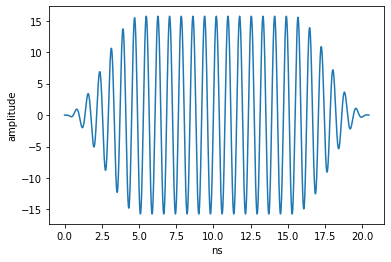

In [432]:
offset = 0.30220436
drive_frequency = (system.first_energy_spacing/3 - offset)
tlist = np.linspace(0, 20.44169987, 10000)
print("drive_frequency", drive_frequency)
pulse_gen.setup(amplitude=2.5*2*np.pi, drive_frequency= drive_frequency, ramp_coef=0.5, tlist=tlist)
plt.plot(tlist, pulse_gen.get_pulse(tlist))
plt.xlabel("ns")
plt.ylabel("amplitude")
# plt.text(0, -25, r'Flat top pulse, ramp coefficient of 0.2', fontsize=16)
plt.show()

In [433]:
# tlist = np.linspace(0, 1000, 1000*10)
# solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=True)

solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=(system.basis_states[0]), pbar=False)
expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)


0.5708648832959438


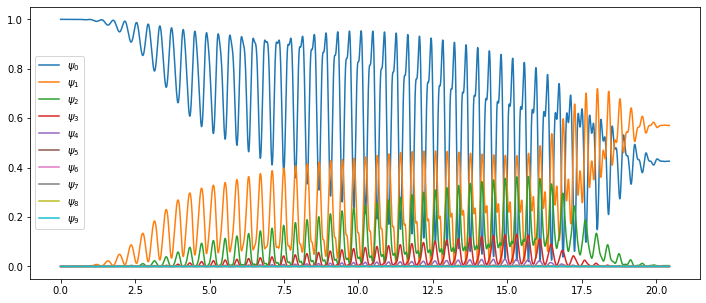

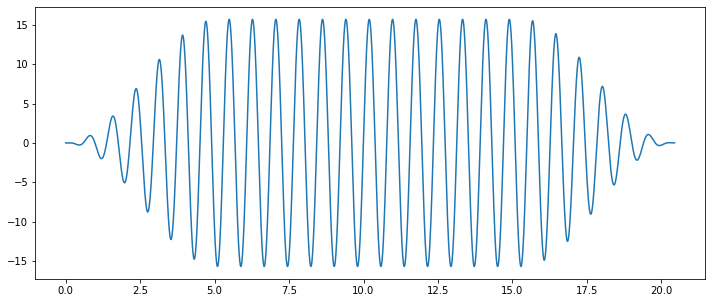

In [434]:
expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
fig, ax = plt.subplots(figsize=(12, 5))
for i in range(0, len(expectation_values)):
    ax.plot(tlist, expectation_values[i], label="$\psi_{%i}$" % i)
plt.legend()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(tlist, pulse_gen.get_pulse(tlist))
print(expectation_values[1][-1])

/var/folders/8w/jht5wjcd4kl492xz8hs9lft40000gn/T/ipykernel_27067/724180425.py:24: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig, azim=-40, elev=30)


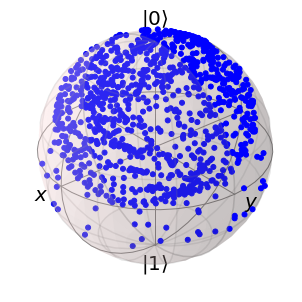

<Figure size 360x360 with 0 Axes>

In [424]:
from qutip import Bloch as bloch
from qutip import ket as ket
from qutip import Qobj

computational_subspace_kets = []
for i in range(0, len(solution.states), 10):
    computational_subspace_ket = [[solution.states[i][0][0][0]], [solution.states[i][1][0][0]]]
    computational_subspace_kets.append(Qobj(computational_subspace_ket))

xs = []
ys = []
zs = []
vecs = []
for ket in computational_subspace_kets:
    xs.append(qutip.expect(qutip.ket2dm(ket), sigmax()))
    ys.append(qutip.expect(qutip.ket2dm(ket), sigmay()))
    zs.append(qutip.expect(qutip.ket2dm(ket), sigmaz()))
    vecs.append([xs[-1], ys[-1], zs[-1]])

from matplotlib import pyplot, animation
from mpl_toolkits.mplot3d import Axes3D

fig = pyplot.figure()
ax = Axes3D(fig, azim=-40, elev=30)
sphere = bloch(axes=ax)

def animate(i):
   sphere.clear()
   sphere.add_points([xs[:i+1], ys[:i+1], zs[:i+1]])
   sphere.make_sphere()
   return ax

def init():
   sphere.vector_color = ['r']
   return ax

ani = animation.FuncAnimation(fig, animate, np.arange(len(xs)),
                              init_func=init, blit=False, repeat=False)

ani.save('bloch_sphere.mp4', fps=20)


In [436]:
from qutip.parallel import parallel_map as parallel_map
from qutip.parallel import parfor as parfor
from tqdm import tqdm as tqdm
all_results = []
_amp = 2.5*2*np.pi
_off = 0
_dur = 50
_ramp_coef = 0.5

# Vary Offset

In [437]:
def vary_offset(off):
    tlist = np.linspace(0, _dur, int(_dur*5))
    pulse_gen.setup(amplitude=_amp, drive_frequency= system.first_energy_spacing/3 - off, ramp_coef=_ramp_coef, tlist=tlist)
    solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=False)
    expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
    return {
        "fidelity": expectation_values[1][-1],
        "offset": off,
        "frequency":  system.first_energy_spacing/3 - off,
        "duration": _dur,
        "amplitude": _amp
    }

offs_to_test = np.linspace(-2, 2, 111)
offset_varying_results = parfor(vary_offset, offs_to_test)

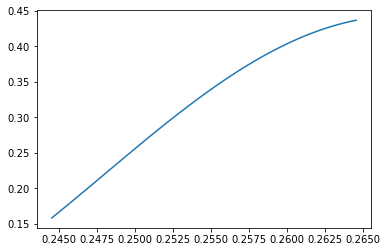

In [441]:
_fids_off_sweep = []
_offs_off_sweep = []
for result in offset_varying_results:
    _fids_off_sweep.append(result["fidelity"])
    _offs_off_sweep.append(result["offset"])

plt.plot(_offs_off_sweep, _fids_off_sweep)
plt.show()
best_offset = offset_varying_results[np.argmax(_fids_off_sweep)]["offset"]
offs_to_test = np.linspace(best_offset-0.01, best_offset+0.01, 50)
offset_varying_results = parfor(vary_offset, offs_to_test)

In [442]:
offset_varying_results[np.argmax(_fids_off_sweep)]

{'fidelity': 0.4110708044475536,
 'offset': 0.2745454545454544,
 'frequency': 8.042653544225331,
 'duration': 50,
 'amplitude': 15.707963267948966}

## Gradient Descent (or at least Simplex)

In [443]:
import scipy

def cost(parameters, constants):
    # parameters = [offset, duration]
    offset = parameters[0]
    duration = parameters[1]
    # constants = [amplitude]
    amplitude = constants[0]
    tlist = np.linspace(0, duration, int(duration*5))
    pulse_gen.setup(amplitude=amplitude, drive_frequency= system.first_energy_spacing/3 - offset, ramp_coef=_ramp_coef, tlist=tlist)
    solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=False)
    expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
    fidelity = expectation_values[1][-1]
    print(fidelity)
    return (1-fidelity)

In [444]:
result1 = scipy.optimize.minimize(cost, [0.2745454545454544, 50], [2.5*2*np.pi], method="Nelder-Mead", options={"disp":True})

0.4110708044475536
0.21663654421048167
0.30408767099131884
0.2998497872837099
0.35852985332191634
0.47191113697228304
0.5369068716343285
0.6189550781229709
0.7328320187176836
0.8267653877464564
0.9085510637630293
0.9971985772325452
0.8193145223509338
0.8145594373617724
0.9376414499232624
0.8620336501877647
0.9671989622653511
0.9717099619810146
0.9549211922684513
0.9896759771097067
0.9636802466221689
0.9919975019066554
0.9957728754577214
0.9798159702818158
0.9981300497495476
0.9948043661369438
0.9983510680959402
0.9922590427388185
0.9988515553658828
0.9960381776755416
0.9988830146185242
0.9988576278654925
0.9983726954318016
0.999077149500574
0.9984432412877635
0.9990619804466757
0.998660041284466
0.9990568340050197
0.9989580449385957
0.999090030580183
0.9990514726651277
0.9990855533967218
0.9990455266134346
0.9990890583146699
0.9990863258120408
0.9990904797110729
0.9990777089172643
0.9990911355984134
0.9990876383415321
0.9990918883500752
0.9990916220618603
0.9990906946691487
0.999092432

In [445]:
result1

 final_simplex: (array([[ 0.26604756, 32.13623438],
       [ 0.26604747, 32.1361462 ],
       [ 0.26604755, 32.13617334]]), array([0.00090742, 0.00090766, 0.0009077 ]))
           fun: 0.0009074221429927753
       message: 'Optimization terminated successfully.'
          nfev: 88
           nit: 40
        status: 0
       success: True
             x: array([ 0.26604756, 32.13623438])

drive_frequency 8.051151437653358


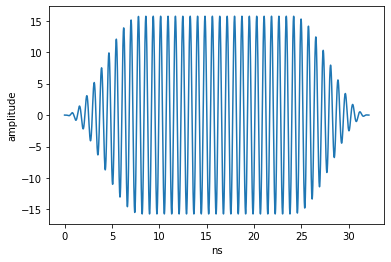

0.9990943183629701


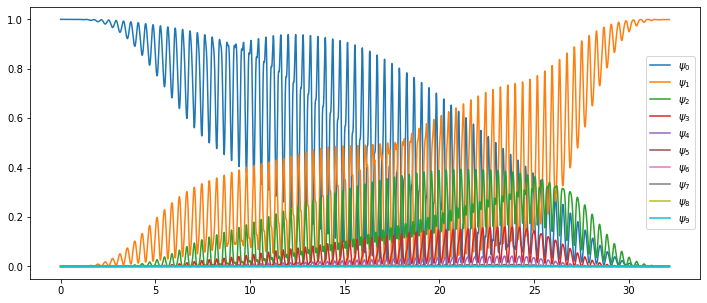

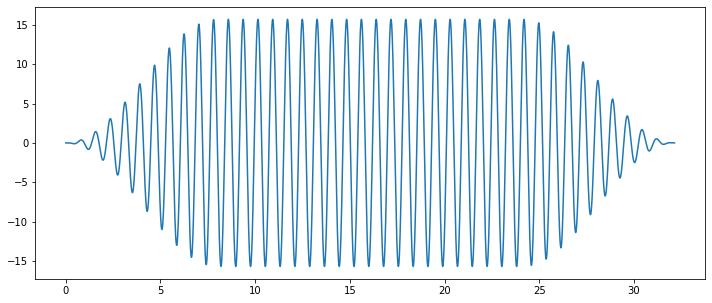

In [446]:
offset = result1.x[0]
drive_frequency = (system.first_energy_spacing/3 - offset)
tlist = np.linspace(0, result1.x[1], 10000)
print("drive_frequency", drive_frequency)
pulse_gen.setup(amplitude=_amp, drive_frequency= drive_frequency, ramp_coef=_ramp_coef, tlist=tlist)
plt.plot(tlist, pulse_gen.get_pulse(tlist))
plt.xlabel("ns")
plt.ylabel("amplitude")
# plt.text(0, -25, r'Flat top pulse, ramp coefficient of 0.2', fontsize=16)
plt.show()

solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=(system.basis_states[0]), pbar=False)
expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)

expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
fig, ax = plt.subplots(figsize=(12, 5))
for i in range(0, len(expectation_values)):
    ax.plot(tlist, expectation_values[i], label="$\psi_{%i}$" % i)
plt.legend()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(tlist, pulse_gen.get_pulse(tlist))
print(expectation_values[1][-1])

# DRAG

needs to be redone with simply applying a pre-generated wave to system

In [495]:
_last_point = 0
_drag_coef = 0.5
_step = 1
_last_t = 0
def pertubation_with_drag(t, args=None):
    global _last_point, _last_t, _step
    _step = t - _last_t
    point = pulse_gen.pulse_func(t)
    if _step == 0:
        two_point_derivative = 0
    else:
        two_point_derivative = (point - _last_point)/_step
    _last_point = point
    _last_t = t
    return (point + _drag_coef*two_point_derivative)

def pwd_for_tlist(tlist):
    r = []
    for t in tlist:
        r.append(pertubation_with_drag(t))

    global _last_point, _last_t, _step
    _last_point = 0
    _last_t = 0
    return r

drive_frequency 8.051151437653358


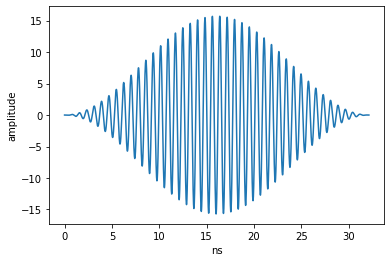

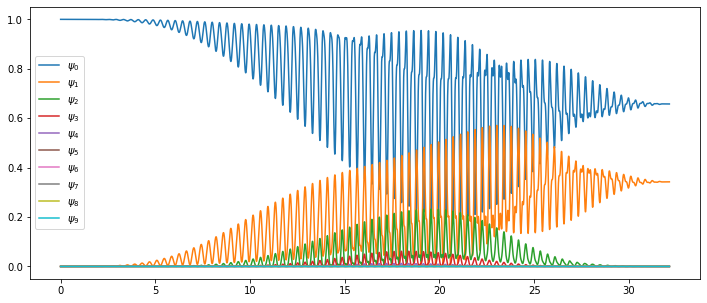

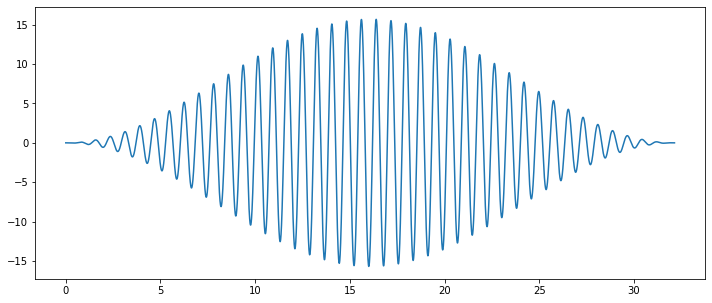

0.34237380765960557
drive_frequency 8.051151437653358


/usr/local/Caskroom/miniforge/base/lib/python3.8/site-packages/scipy/integrate/_ode.py:1013: UserWarning: zvode: Excess work done on this call. (Perhaps wrong MF.)
  warnings.warn('{:s}: {:s}'.format(self.__class__.__name__,


Exception: ODE integration error: Try to increase the allowed number of substeps by increasing the nsteps parameter in the Options class.

In [496]:
offset = result1.x[0]
drive_frequency = (system.first_energy_spacing/3 - offset)
tlist = np.linspace(0, result1.x[1], 10000)
print("drive_frequency", drive_frequency)
pulse_gen.setup(amplitude=_amp, drive_frequency= drive_frequency, ramp_coef=1, tlist=tlist)
plt.plot(tlist, pulse_gen.get_pulse(tlist))
plt.xlabel("ns")
plt.ylabel("amplitude")
# plt.text(0, -25, r'Flat top pulse, ramp coefficient of 0.2', fontsize=16)
plt.show()

solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=(system.basis_states[0]), pbar=False)
expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)

expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
fig, ax = plt.subplots(figsize=(12, 5))
for i in range(0, len(expectation_values)):
    ax.plot(tlist, expectation_values[i], label="$\psi_{%i}$" % i)
plt.legend()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(tlist, pulse_gen.get_pulse(tlist))
plt.show()
print(expectation_values[1][-1])

offset = result1.x[0]
drive_frequency = (system.first_energy_spacing/3 - offset)
tlist = np.linspace(0, result1.x[1], 100000)
print("drive_frequency", drive_frequency)
pulse_gen.setup(amplitude=_amp, drive_frequency= drive_frequency, ramp_coef=1, tlist=tlist)
# plt.plot(tlist, pwd_for_tlist(tlist))
# plt.xlabel("ns")
# plt.ylabel("amplitude")
# # plt.text(0, -25, r'Flat top pulse, ramp coefficient of 0.2', fontsize=16)
# plt.show()

solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pertubation_with_drag, tlist=tlist, starting_state=(system.basis_states[0]), pbar=False)
expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)

expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
fig, ax = plt.subplots(figsize=(12, 5))
for i in range(0, len(expectation_values)):
    ax.plot(tlist, expectation_values[i], label="$\psi_{%i}$" % i)
plt.legend()
fig, ax = plt.subplots(figsize=(12, 5))
ax.plot(tlist, pulse_gen.get_pulse(tlist))
print(expectation_values[1][-1])

In [ ]:

def cost_with_drag(parameters, constants):
    # parameters = [offset, duration]
    offset = parameters[0]
    duration = parameters[1]
    drag_coef = parameters[2]
    # constants = [amplitude]
    amplitude = constants[0]
    tlist = np.linspace(0, duration, int(duration*5))
    pulse_gen.setup(amplitude=amplitude, drive_frequency= system.first_energy_spacing/3 - offset, ramp_coef=_ramp_coef, tlist=tlist)
    solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=False)
    expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
    fidelity = expectation_values[1][-1]
    print(fidelity)
    return (1-fidelity)



# Fidelity Landscape

In [331]:
all_results = []

In [332]:
def run_once(dur):
    ramp_coef = 0.2
    tlist = np.linspace(0, dur, int(dur*2))
    pulse_gen.setup(amplitude=_amp, drive_frequency= system.first_energy_spacing/3 - _off, ramp_coef=ramp_coef, tlist=tlist)
    solution = solver.time_evolve(H_d=system.H0, H_c=system.H1, pertubation_func=pulse_gen.pulse_func, tlist=tlist, starting_state=system.basis_states[0], pbar=False)
    expectation_values = expect.get_all_expectation_values(solution.states, system.basis_states)
    return {
        "fidelity": expectation_values[1][-1],
        "offset": _off,
        "frequency":  system.first_energy_spacing/3 - off,
        "duration": dur,
        "amplitude": _amp,
        "ramp_coef": ramp_coef
    }

for off in tqdm(np.linspace(0.1, 0.5, 50)):
    _off = off
    already_did_this_offset = False
    for grouping in all_results:
        for result in grouping:
            if result["offset"] == _off:
                already_did_this_offset = True
                break
    if already_did_this_offset:
        continue

    all_results.append(parallel_map(run_once, np.linspace(1, 200, 50))) # , progress_bar=True

100%|██████████| 50/50 [10:20<00:00, 12.42s/it]


In [86]:
import utils.saver as saver

# saver.save(all_results, "temp_experimental_landscape")
# all_results = saver.load("temp_experimental_landscape")

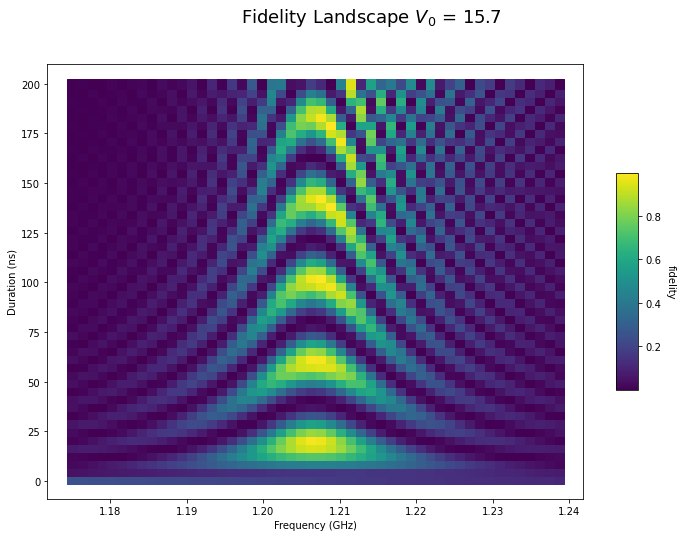

In [333]:
import copy
# %matplotlib widget

amps = []
offs = []
durs = []
fids = []
all_results_to_graph = copy.deepcopy(all_results)
for grouping in all_results_to_graph:
    for result in grouping:
        amps.append(result["amplitude"])
        offs.append(result["offset"])
        durs.append(result["duration"])
        fids.append(result["fidelity"])

fig, axs = plt.subplots(figsize=(12, 8))
fig.suptitle("Fidelity Landscape $V_0$ = %.1f" % amps[-1], fontsize=18)
axs.set_xlabel("Frequency (GHz)")
axs.set_ylabel("Duration (ns)")
freqs = (system.first_energy_spacing/3 - np.array(offs)) / (2*np.pi)
surf = axs.scatter(freqs, durs, c=fids, cmap=None, marker="s", s=100)
cbar = fig.colorbar(surf, shrink=0.5, aspect=10)
cbar.ax.set_ylabel("fidelity", rotation=270)
cbar.ax.get_yaxis().labelpad = 15
# axs.pcolormesh(offs, durs, fids)

# Fitting E_j and E_c based on supplied params

This was a bad idea. did not work well

In [391]:
from qutip import *
basis_size = 10

a = destroy(basis_size)

# E_c = -2*anharm
# E_j = (omega_0 + E_c)**2 / (8*E_c)

E_c = system.E_c
E_j = system.E_j

n_hat = Qobj((E_j / (32 * E_c)) ** (1 / 4) * (a.dag() - a))

theta_hat = Qobj(
    ((2 * E_c) / E_j) ** (1 / 4) * (a.dag() + a)
)

H_R = full_cosine_hamiltonian = -4 * E_c * n_hat ** 2 - E_j * theta_hat.cosm()

# full_cosine_basis_states = full_cosine_hamiltonian.eigenstates()[1]
full_cosine_energies = full_cosine_hamiltonian.eigenenergies()

def cost_for_params(parameters):
    E_j = np.abs(parameters[1])
    E_c = np.abs(parameters[0])
    print(E_c, E_j)

    n_hat = Qobj((E_j / (32 * E_c)) ** (1 / 4) * (a.dag() - a))
    theta_hat = Qobj(
        ((2 * E_c) / E_j) ** (1 / 4) * (a.dag() + a)
    )
    energies = (-4 * E_c * n_hat ** 2 - E_j * theta_hat.cosm()).eigenenergies()
    first_energy_spacing = (energies[1] - energies[0])
    anharm_diff = np.abs(system.anharm - np.abs((energies[2] - energies[1]) - (energies[1] - energies[0])))
    omega_diff = np.abs(system.omega_01 - first_energy_spacing)
    return omega_diff

ree = scipy.optimize.minimize(cost_for_params, [E_c, E_j], method="Nelder-Mead", options={"disp":True, "maxiter": 10000})

2.607898893597959 36.40506422481128
2.738293838277857 36.40506422481128
2.607898893597959 38.22531743605184
2.7382938382778566 38.225317436051846
2.6404976297679332 36.860127527621415
2.7708925744478314 35.039874316380846
2.7301441542353633 35.836235096298594
2.63234794572544 36.29129839910873
2.7118073651397525 36.376622768385644
2.622160840672322 37.400515199708465
2.649156669063083 37.009445173855994
2.577846933691263 37.492949933091765
2.67831725727763 36.655704559562174
2.669658217982481 36.50638691332759
2.6542820562929323 36.88368060872389
2.6921016838026293 36.679257640664645
2.6533986432766072 36.81491005588222
2.6293634422919094 37.04288610504394
2.6284800292755843 36.97411555220228
2.647831549538595 36.90628934459349
2.671866750523293 36.67831329543177
2.661240923465447 36.76945649783481
2.6556738297274345 36.860835786546076
2.653967439889314 36.82639148854818
2.640558065962462 36.96322433530686
2.6457287803382084 36.91478237593885
2.6518646706889273 36.834884519893535
2.648

In [386]:
ree

 final_simplex: (array([[  0.42369378, 189.99323993],
       [  0.42842213, 188.04427809],
       [  0.42537692, 189.25044995]]), array([1.75058118, 1.75061317, 1.75354804]))
           fun: 1.7505811810270533
       message: 'Maximum number of function evaluations has been exceeded.'
          nfev: 401
           nit: 226
        status: 1
       success: False
             x: array([  0.42369378, 189.99323993])

In [392]:
import system.tunable_full_cosine as tunable_system
tunable_system.setup(ree.x[0], ree.x[1])
print("supplied")
print("anharmonicty",system.anharm / (2*np.pi))
print("energy level spacing", system.omega_0 / (2*np.pi))
print()

print("standard form")
print("1st energy level spacing : ", (tunable_system.energies[1] - tunable_system.energies[0]) / (2*np.pi))
print("2nd energy level spacing : ", (tunable_system.energies[2] - tunable_system.energies[1]) / (2*np.pi))
print("difference in 1st & 2nd spacing : ", (tunable_system.energies[1] - tunable_system.energies[0]) / (2*np.pi) - (tunable_system.energies[2] - tunable_system.energies[1]) / (2*np.pi))
print("above minus anharm", ((tunable_system.energies[1] - tunable_system.energies[0]) / (2*np.pi) - (tunable_system.energies[2] - tunable_system.energies[1]) / (2*np.pi)) + system.anharm / (2*np.pi))
print()

supplied
anharmonicty -0.20752999999999996
energy level spacing 3.97117

standard form
1st energy level spacing :  3.971169999995835
2nd energy level spacing :  3.390188673017979
difference in 1st & 2nd spacing :  0.5809813269778563
above minus anharm 0.3734513269778563



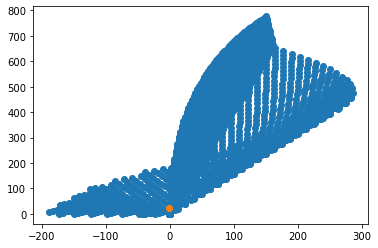

In [498]:
def test(E_c, E_j):
    a = destroy(basis_size)
    n_hat = Qobj((E_j / (32 * E_c)) ** (1 / 4) * (a.dag() - a))
    theta_hat = Qobj(
        ((2 * E_c) / E_j) ** (1 / 4) * (a.dag() + a)
    )
    energies = (-4 * E_c * n_hat ** 2 - E_j * theta_hat.cosm()).eigenenergies()
    first_energy_spacing = (energies[1] - energies[0])
    omega = first_energy_spacing
    anharm = - ((energies[2] - energies[1]) - (energies[1] - energies[0]))
    return omega, anharm

anharms = []
omegas = []
best = [100, 100]
last_best = 10
for c in np.linspace(0.01, 100):
    for j in np.linspace(0.01, 1000):
        o, a = test(c,j)
        anharms.append(a)
        omegas.append(o)
        anharm_diff = np.abs(system.anharm - a)
        omega_diff = np.abs(system.omega_01 - o)
        if (anharm_diff+omega_diff) < last_best:
            last_best = (anharm_diff+omega_diff)
            best = [c, j, a, o, last_best]
plt.scatter(anharms, omegas)
plt.scatter(system.anharm, system.omega_01)


In [499]:
best

[2.050612244897959,
 40.82591836734694,
 2.631213708077542,
 23.615528091463055,
 5.271232059725824]